# GEOG696C Spatiotemporal Data Analysis
## Homework #1
Alex Saunders | Last updated: 1 September 2023

In [1]:
from pathlib import Path
import os
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt, colors
from matplotlib.collections import LineCollection
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patheffects as pe
from datetime import datetime
import calendar
# import matplotlib.ticker as ticker
# from matplotlib.ticker import MultipleLocator

In [3]:
# Set the root path
# rootPath = Path('C:/Users/alexa/Documents/GitHub/dissertation/dissertation')
rootPath = Path('C:/Users/alexsaunders/Documents/01_uoa/04_git/dissertation')
dataPath = rootPath/'data/flodis'

## Read in the data
Total of 13 responses

In [23]:
displacement = pd.read_csv(dataPath/'FLODIS_displacement.csv',index_col=0)
damage = pd.read_csv(dataPath/'FLODIS_mortality_damage.csv',index_col=0)

In [24]:
# Filter for Bangladesh entries and sort by year
displacement=displacement[displacement.ISO3=='BGD'].sort_values('year').reset_index()
damage=damage[damage.ISO3=='BGD'].sort_values('year').reset_index()

Total of 17 events between 2001 and 2015

In [25]:
displacement

,index,ISO3,year,displacements,GID_1,GID_2,num_provinces,num_districts,GFD_matches,GFD_matches_nr,...,landuse_total_mean,elevation_mean,roughness_mean,slope_mean,female_mean,pop_0_14_mean,pop_65_plus_mean,FLOPROS_merged_mean,FLOPROS_modeled_mean,forest_cover_mean
0,41,BGD,2008.0,57440.0,NaN,NaN,NaN,NaN,3,"[3365, 3371, 3372]",...,0.66755,12.23208,3.49605,0.242530,0.504540,0.378560,0.04953,52.831400,2.595880,0.000040
1,42,BGD,2008.0,2250.0,NaN,NaN,NaN,NaN,1,3327,...,0.56796,11.63655,3.15650,0.215040,0.501450,0.404360,0.04810,51.153850,2.423080,0.000050
2,43,BGD,2014.0,542000.0,NaN,NaN,NaN,NaN,4,"[4171, 4174, 4176, 4178]",...,0.66525,11.90103,3.42109,0.238810,0.503750,0.385360,0.04935,52.435530,2.511460,0.000040
3,44,BGD,2015.0,96398.0,NaN,NaN,NaN,NaN,1,4259,...,0.76448,17.36068,3.77676,0.272650,0.505100,0.354310,0.04856,52.824860,2.830510,0.000000
4,279,BGD,2016.0,117450.0,NaN,BGD.4.3_1,NaN,1.0,1,4382,...,0.55572,8.14304,3.63900,0.259345,0.502655,0.336845,0.05341,49.978155,2.321755,0.000075
5,45,BGD,2017.0,436191.0,"BGD.2_1,BGD.3_1,BGD.4_1,BGD.5_1,BGD.6_1,BGD.7_1","BGD.2.4_1,BGD.3.1_1,BGD.3.10_1,BGD.4.5_1,BGD.5...",6.0,7.0,1,4499,...,0.44555,3.21384,2.89443,0.205950,0.503590,0.311460,0.06056,44.827590,2.034480,0.000090
6,46,BGD,2017.0,12012.0,BGD.7_1,"BGD.3.6_1,BGD.3.13_1,BGD.7.1_1,BGD.7.2_1,BGD.7...",1.0,6.0,1,4459,...,0.53668,9.86531,3.16326,0.213540,0.499990,0.415580,0.04609,53.351960,2.296090,0.000070
7,47,BGD,2018.0,6000.0,NaN,BGD.2.8_1,NaN,1.0,1,4632,...,0.11596,37.36250,8.58750,0.743400,0.480680,0.363480,0.03889,50.000000,2.000000,0.000170
8,48,BGD,2018.0,1260.0,NaN,NaN,NaN,NaN,1,4666,...,0.23154,11.30763,4.63669,0.345060,0.501790,0.408610,0.04382,36.807230,1.566270,0.000130
9,49,BGD,2018.0,176.0,NaN,BGD.2.7_1,NaN,1.0,1,4632,...,0.36649,7.44238,3.85084,0.277690,0.520050,0.356650,0.05618,53.333330,2.400000,0.000110


In [26]:
damage

,index,ISO3,year,disasterno,total_deaths,no_injured,no_affected_EMDAT,no_homeles,total_affected_EMDAT,total_damages_(000_USD),...,landuse_total_mean,elevation_mean,roughness_mean,slope_mean,female_mean,pop_0_14_mean,pop_65_plus_mean,FLOPROS_merged_mean,FLOPROS_modeled_mean,forest_cover_mean
0,438,BGD,2001.0,2001-0459,NaN,NaN,200000.0,NaN,200000.0,NaN,...,0.753280,15.620100,4.938730,0.360950,0.502280,0.31638,0.050540,55.00000,3.30000,0.00000
1,105,BGD,2003.0,2003-0303,65.0,NaN,500000.0,NaN,500000.0,NaN,...,0.409190,9.514090,3.310720,0.225170,0.504900,0.40758,0.050190,45.16624,1.92583,0.00007
2,16,BGD,2004.0,2004-0298,730.0,NaN,36000000.0,NaN,36000000.0,2200000.0,...,0.647570,11.290450,3.542540,0.240330,0.507410,0.37729,0.052080,51.59847,2.38363,0.00007
3,615,BGD,2004.0,"2004-0509,2004-0470",31.0,200.0,871500.0,0.0,871700.0,0.0,...,0.643785,13.010575,3.408435,0.228965,0.510625,0.36632,0.049845,55.62500,2.74375,0.00007
4,163,BGD,2005.0,2005-0375,23.0,NaN,1000000.0,NaN,1000000.0,NaN,...,0.733210,17.434060,3.795520,0.264120,0.504880,0.35652,0.049060,52.57937,2.64683,0.00001
5,185,BGD,2005.0,2005-0590,19.0,NaN,100000.0,NaN,100000.0,NaN,...,0.790700,21.519610,3.519720,0.237210,0.501330,0.31818,0.050810,53.40136,3.03401,0.00000
6,374,BGD,2005.0,2005-0261,13.0,NaN,50000.0,NaN,50000.0,NaN,...,0.588760,10.876970,3.154810,0.205690,0.507940,0.40024,0.046610,51.44928,2.14493,0.00007
7,552,BGD,2006.0,2006-0262,NaN,NaN,76000.0,NaN,76000.0,NaN,...,0.489430,10.248850,3.274130,0.219230,0.502760,0.41726,0.046360,54.51389,2.40972,0.00009
8,117,BGD,2006.0,2006-0502,NaN,NaN,135775.0,NaN,135775.0,NaN,...,0.487950,3.001400,3.266440,0.239030,0.509740,0.31407,0.064120,48.29545,2.48864,0.00005
9,380,BGD,2007.0,2007-0161,120.0,60.0,80000.0,NaN,80060.0,14000.0,...,0.306570,8.185980,3.865450,0.280490,0.511470,0.40615,0.048230,40.86142,1.73034,0.00006


## Summarize key info from the data

#### Create index for each column name for ease of summarizing

In [20]:
damageCols = pd.DataFrame(data=[list(range(len(damage.columns))), list(damage.columns)], index=['i','colName'])

In [21]:
damageCols

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
i,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
colName,ISO3,year,disasterno,total_deaths,no_injured,no_affected_EMDAT,no_homeles,total_affected_EMDAT,total_damages_(000_USD),idx,...,landuse_total_mean,elevation_mean,roughness_mean,slope_mean,female_mean,pop_0_14_mean,pop_65_plus_mean,FLOPROS_merged_mean,FLOPROS_modeled_mean,forest_cover_mean


## Plot the number of people affected
Database provides two approaches - one simply from EM-DAT (i.e. media reports etc), the other by merging the GFD spatial extent with population raster (GHSL, GPW)

### !But in FLODIS they have removed the start and end dates - need to pull back in from GFD?

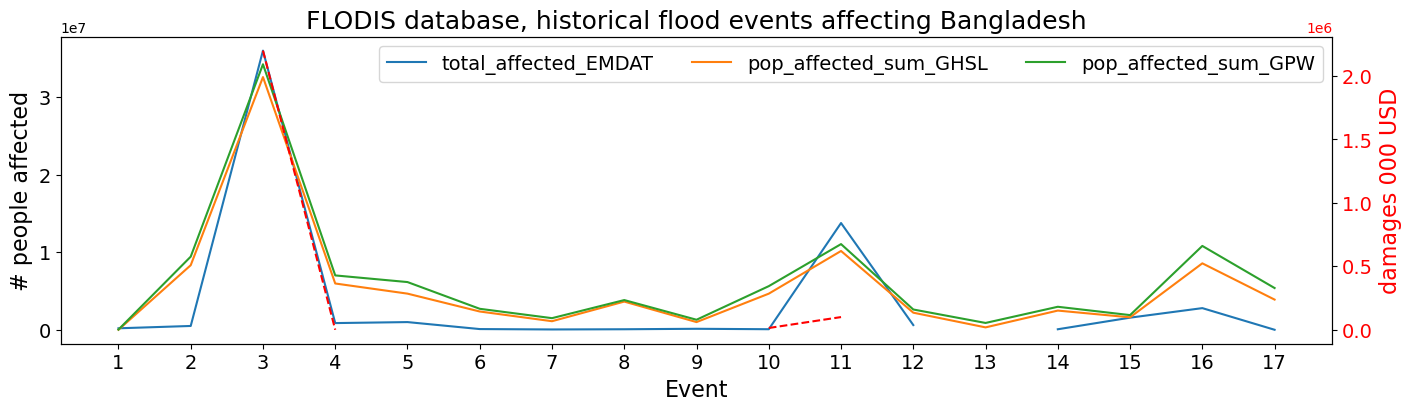

In [54]:
fig, ax = plt.subplots(figsize=(14,4), constrained_layout=True) 

ax.set_title('FLODIS database, historical flood events affecting Bangladesh', fontsize=18)

ax.plot(damage.total_affected_EMDAT, label='total_affected_EMDAT')
ax.plot(damage.pop_affected_sum_GHSL, label='pop_affected_sum_GHSL')
ax.plot(damage.pop_affected_sum_GPW, label='pop_affected_sum_GPW')
ax2=ax.twinx()
ax2.plot(damage['total_damages_(000_USD)'], 'r--')

ax.set_ylabel('# people affected', fontsize=16)
ax.set_xlabel('Event', fontsize=16)
ax2.set_ylabel('damages 000 USD', fontsize=16, color='r')
# ax.set_ylim(0,100)
# ax.set_xlim(0,(2022-1984)*12)
ax.set_xticks(list(range(0,len(damage))), list(range(1,len(damage)+1)), fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14, labelcolor='r')


ax.legend(loc='upper right', ncol=3, fontsize=14)

plt.show()